In [1]:
import warnings
warnings.filterwarnings('ignore')
from pc_model import plot_query, score_query, score_model_similarity, Marr2Algorithms
import numpy as np
import seaborn as sb
import sys
from scipy.stats import wilcoxon, ttest_1samp
sb.set()
from matplotlib import pyplot as pl
np.random.seed()
%matplotlib inline
sb.set()
current_palette = sb.color_palette()



In [2]:
ms = np.load('ms.npy')
p_inits = np.load('p_inits.npy')
strike_params = np.load('strike_params.npy')
simlist_by_hunt = np.load('simlist_by_hunt.npy')

In [2]:
run pc_model

Building Independent Reg Model
Building Independent Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
[Counter({1: 112, 2: 19, 3: 8}), Counter({1: 62, 2: 53, 3: 24}), Counter({1: 59, 2: 58, 3: 22}), Counter({1: 82, 2: 37, 3: 20}), Counter({1: 102, 2: 21, 3: 16})]


In [3]:
marralgs = Marr2Algorithms(p_inits, strike_params)
marralgs.run_marr2_models(25)
marralgs.result_plotter()

in bayes
8
2
10
4
5
13
6
14
5
6
6
8
8
7
6
10
6
5
7
5
8
14
6
3
6
13
7
5
9
3
10
3
6
8
7
4
11
8
4
4
5
8
3
6
9
5
11
11
4
8
3
2
7
5
4
4
4
10
6
5
2
6
5
6
7
3
6
3
4
7
4
2
4
5
3
14
10
4
3
3
2
4
6
3
5
6
9
4
2
4
4
2
3
4
2
3
8
8
4
13
20
2
5
6
11
3
4
1
3
4
7
2
6
3
2
6
14
4
4
5
3
3
8
5
6
4
9
4
2
7
7
5
7
7
5
8
6
12
3
7
2
5
3
5
13
9
11
2
2
7
9
7
7
10
9
12
12
7
12
7
8
2
9
7
10
5
7
12
4
4
12
3
10
4
3
8
6
6
5
4
11
9
3
6
20
10
13
3
7
13
4
5
12
15
7
8
7
6
2
7
8
4
8
6
5
4
4
3
5
5
5
9
3
10
6
13
5
13
3
8
2
10
8
6
9
7
9
5
7
7
14
8
4
6
5
10
3
4
9
20
8
7
17
7
10
4
1
16
4
4
3
5
4
2
12
4
4
5
11
3
5
10
4
12
3
7
6
3
3
6
5
7
6
9
3
4
15
7
11
4
5
3
8
12
7
9
2
7
5
5
9
7
9
11
15
11
11
7
8
7
3
3
7
8
6
4
12
2
6
9
5
5
4
2
5
7
15
6
9
4
3
5
8
3
8
8
10
5
14
3
10
6
4
6
4
10
9
5
10
9
5
8
8
5
2
9
15
9
9
2
2
9
2
2
6
8
2
3
10
4
11
6
4
5
10
4
10
8
7
10
11
4
3
4
5
5
4
6
4
7
5
6
4
2
4
1
11
6
9
15
8
6
2
7
8
3
6
5
11
4
13
3
16
8
4
9
3
5
7
9
14
3
6
3
5
7
5
9
6
14
4
9
6
4
9
2
4
11
14
10
5
7
4
9
8
9
7
11
5
4
2
8
11
7
6
6
6
3
6
5
13
9
2
8


AttributeError: Marr2Algorithms instance has no attribute 'result_plotter'

[Ttest_indResult(statistic=2.6163850252182876, pvalue=0.0093761202937631179), Ttest_indResult(statistic=-0.39936438501112054, pvalue=0.68993358391643733), Ttest_indResult(statistic=0.59346778912497977, pvalue=0.55335416333457677), Ttest_indResult(statistic=0.81224935120279596, pvalue=0.41734857691797134), Ttest_indResult(statistic=0.4183498817793464, pvalue=0.67601665267905409), Ttest_indResult(statistic=-0.85622194513383321, pvalue=0.39261777265081543), Ttest_indResult(statistic=nan, pvalue=nan), Ttest_indResult(statistic=0.88571189799348549, pvalue=0.37654381892961664), Ttest_indResult(statistic=-0.10320136741222204, pvalue=0.9178781001874321), Ttest_indResult(statistic=nan, pvalue=nan), Ttest_indResult(statistic=0.58784948073056309, pvalue=0.5571139880540994), Ttest_indResult(statistic=0.35294816323265449, pvalue=0.7243967043183378), Ttest_indResult(statistic=0.32526697801192178, pvalue=0.74522545375361138), Ttest_indResult(statistic=nan, pvalue=nan), Ttest_indResult(statistic=0.641

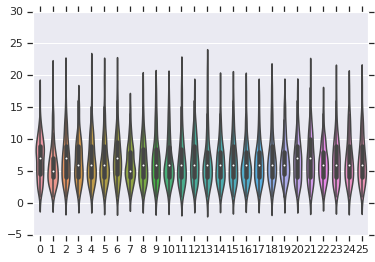

In [4]:
marralgs.result_compiler()

In [31]:
def nanremove(arr):
    a = []
    for b in arr:
        if not np.isfinite(b):
            b = 100
        a.append(b)
    return np.array(a)

all_results = [nanremove(marralgs.bouts_static)] 
for bayesbouts in marralgs.bouts_bayes:
    all_results.append(nanremove(bayesbouts))
wilcoxon_results = np.around([wilcoxon(all_results[0], all_results[i+1])[1]
                for i in range(len(marralgs.bouts_bayes))], decimals=4)

print wilcoxon_results

fails = [f[np.isnan(f)].shape[0] for f in all_results]
averages = [np.median(f) for f in all_results]
print fails
print averages
print ttest_1samp(averages[1:], averages[0])

[ 0.      0.7606  0.3609  0.0986  0.1071  0.5604  0.0304  0.0856  0.6972
  0.1276  0.0759  0.5327  0.0635  0.2292  0.3517  0.0141  0.0462  0.8524
  0.771   0.5151  0.6318  0.0433  0.1853  0.3469  0.5096]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7.0, 5.0, 7.0, 6.0, 6.0, 6.0, 7.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0]
Ttest_1sampResult(statistic=-9.3251758219129055, pvalue=1.8893914982390291e-09)


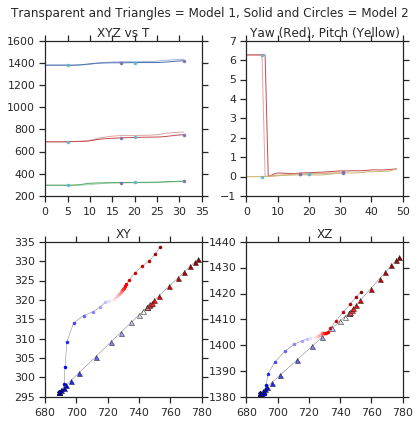

(15.860730189712827, 0.0386875, -0.059130790849362076)

In [21]:
sb.set_style('white')
score_model_similarity(True, simlist_by_hunt[30][0], simlist_by_hunt[30][3])

In [4]:
marralgs = Marr2Algorithms(np.array(p_inits[0:2]), strike_params)
marralgs.marr_bdb_file.np_prng

In [5]:
marralgs.run_marr2_models()

in bayes
{'Para Alt': 0.21946309470753914, 'Para Az': -0.87878194986387825, 'Para Dist': 314.59252497452428}
{'Para Alt': 0.24888271368568035, 'Para Az': -0.41734288597898306, 'Para Dist': 286.96179824877794}
{'Para Alt': 0.34630985221486049, 'Para Az': 0.22164247073442184, 'Para Dist': 217.95294779615608}
{'Para Alt': 0.69232131451982393, 'Para Az': -0.065001753447018251, 'Para Dist': 162.63795683015897}
{'Para Alt': 0.9442427025512663, 'Para Az': 0.21858068035556216, 'Para Dist': 144.97942663383529}
{'Para Alt': 0.19225918441074211, 'Para Az': 0.24201327629701111, 'Para Dist': 138.01875531568672}
{'Para Alt': 0.091159282892932958, 'Para Az': -0.16298869656702578, 'Para Dist': 52.487400948080051}
{'Para Alt': 0.40884751764809779, 'Para Az': -0.04288735649735434, 'Para Dist': 72.915532081880713}


In [8]:
marralgs = Marr2Algorithms(np.array(p_inits[0:2]), strike_params)
marralgs.run_marr2_models()


in bayes
{'Para Alt': 0.21946309470753914, 'Para Az': -0.87878194986387825, 'Para Dist': 314.59252497452428}
{'Para Alt': 0.24888271368568035, 'Para Az': -0.41734288597898306, 'Para Dist': 286.96179824877794}
{'Para Alt': 0.34630985221486049, 'Para Az': 0.22164247073442184, 'Para Dist': 217.95294779615608}
{'Para Alt': 0.69232131451982393, 'Para Az': -0.065001753447018251, 'Para Dist': 162.63795683015897}
{'Para Alt': 0.9442427025512663, 'Para Az': 0.21858068035556216, 'Para Dist': 144.97942663383529}
{'Para Alt': 0.19225918441074211, 'Para Az': 0.24201327629701111, 'Para Dist': 138.01875531568672}
{'Para Alt': 0.091159282892932958, 'Para Az': -0.16298869656702578, 'Para Dist': 52.487400948080051}
{'Para Alt': 0.40884751764809779, 'Para Az': -0.04288735649735434, 'Para Dist': 72.915532081880713}


in bayes
0
1
2
3
4
5
6
0
0
1
2
3
4
5
6
7
8
0
1
2
0
1
2
3
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
6
7
8
0
1
2
3
4
0
1
2
3
0
1
2
3
4
5
0
1
2
3
0
1
2
3
4
5
6
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
0
1
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
0
1
2
3
0
1
2
3
4
5
6
7
0
1
0
1
2
3
4
5
6
7
8
0
1
0
1
2
3
4
0
1
2
3
4
5
6
0
1
2
3
4
5
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
0
1
2
0
1
2
0
1
2
3
0
1
2
3
4
5
6
0
1
0
1
2
3
4
0
1
2
3
4
5
6
7
0
1
2
3
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
0
1
0
0
1
2
3
4
5
0
1
2
3
0
1
2
0
1
2
0
1
2
0
1
2
3
4
5
6
7
8
0
1
2
3
4
0
1
2
3
0
0
1
2
3
4
0
1
2
3
0
1
2
3
4
0
1
2
3
4
5
0
1
0
1
2
3
4
0
1
0
1
2
0
1
2
3
4
5
0
1
2
0
0
1
2
0
1
2
3
0
1
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
0
1
2
0
1
0
1
0
0
1
2
0
1
2
3
4
0
1
0
1
2
3
0
1
2
3
4
0
1
2
3
4
5
6
7
0
1
2
0
0
1
2
0
1
2
0
0
1
0
1
2
0
0
1
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
0
1
2
3


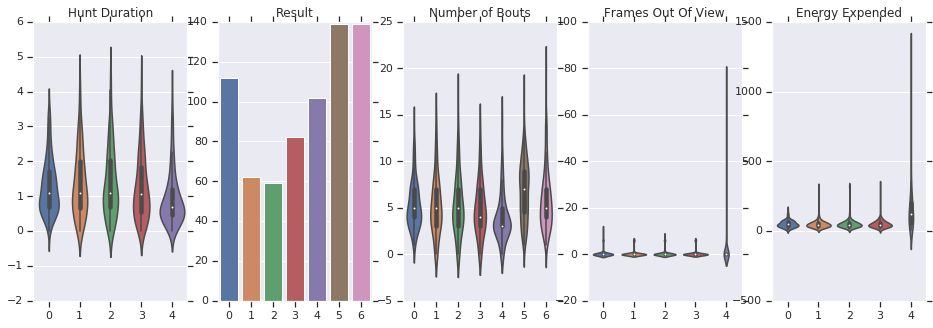

In [4]:
fig = plot_query(ms, p_inits, strike_params, 'violin')
fig.savefig('model_results.pdf')

In [ ]:
para_var